In [49]:
import sys
print(sys.executable)


import sys
!{sys.executable} -m pip install matplotlib seaborn scikit-learn


C:\Users\skimr\AppData\Local\Programs\Python\Python313\python.exe



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\skimr\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


# Load and explore the house prices dataset:
# - Read the CSV file into a DataFrame
# - Preview the first few rows
# - Check the structure and data types
# - Get summary statistics of numerical columns
import pandas as pd

In [6]:
df = pd.read_csv("house_prices.csv")  # Update with your file name

# Preview dataset
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


# Print the list of all column names in the DataFrame

In [15]:
print(df.columns.tolist())


['Index', 'Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']


In [17]:
['Index', 'Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']


['Index',
 'Title',
 'Description',
 'Amount(in rupees)',
 'Price (in rupees)',
 'location',
 'Carpet Area',
 'Status',
 'Floor',
 'Transaction',
 'Furnishing',
 'facing',
 'overlooking',
 'Society',
 'Bathroom',
 'Balcony',
 'Car Parking',
 'Ownership',
 'Super Area',
 'Dimensions',
 'Plot Area']

# Remove unnecessary columns that are not needed for analysis

In [19]:
df.drop(columns=['Society', 'Title', 'Description'], inplace=True)


# Handle missing values:
# - Fill numeric columns’ NaNs with their median values
# - Fill remaining NaNs (likely categorical) with "Unknown"


In [29]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)  # For categorical


# Encode categorical columns using Label Encoding:
# Convert text categories into numeric labels for modeling
from sklearn.preprocessing import LabelEncoder

In [31]:
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate features and target variable:
# - X contains all input features
# - y contains the target variable to predict (house price)

In [33]:
X = df.drop(['Amount(in rupees)'], axis=1)
y = df['Amount(in rupees)']


# Scale features to have mean=0 and standard deviation=1
# This helps improve model performance and convergence
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the dataset into training and testing sets
# 80% for training and 20% for testing, with a fixed random state for reproducibility
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Visualize relationships and target distribution:
# - Correlation heatmap to see feature correlations with each other and target
# - Histogram with KDE to check distribution of house prices (target variable)

import matplotlib.pyplot as plt
import seaborn as sns

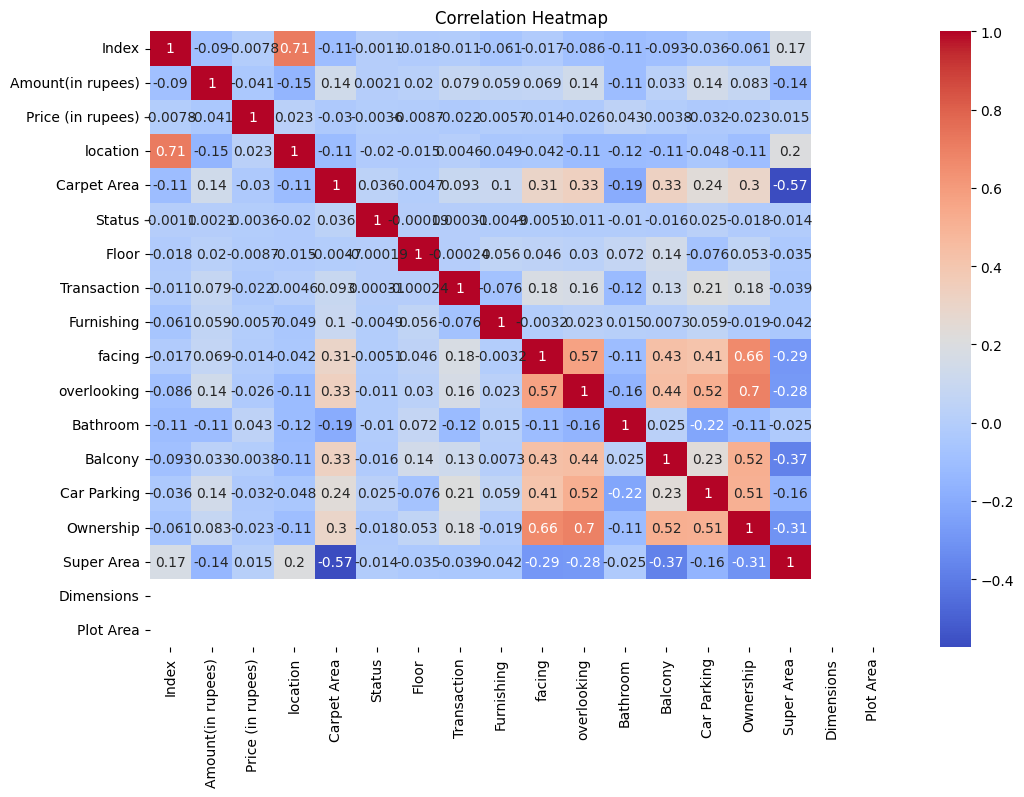

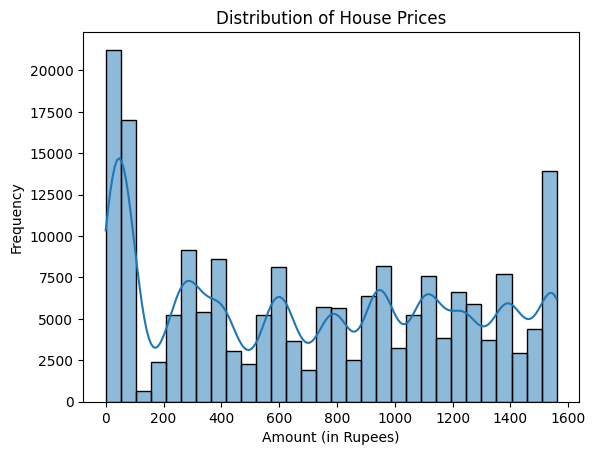

In [39]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Plot target distribution
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Amount (in Rupees)")
plt.ylabel("Frequency")
plt.show()


# Train a Linear Regression model on the training data
# Predict house prices on the test data
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Create polynomial features (degree 2) to capture nonlinear relationships
# Split transformed data into train and test sets
# Train Linear Regression on polynomial features and make predictions

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)


# Train a Ridge Regression model with regularization (alpha=1.0)
# Predict house prices on the test data to reduce overfitting
from sklearn.linear_model import Ridge

In [45]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


# Define a function to evaluate models using MSE and RMSE metrics
# Then evaluate Linear, Polynomial, and Ridge regression models and print results

from sklearn.metrics import mean_squared_error
import numpy as np

In [47]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name}:\n MSE: {mse:.2f}, RMSE: {rmse:.2f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test_poly, y_pred_poly, "Polynomial Regression (Degree=2)")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")


Linear Regression:
 MSE: 241291.13, RMSE: 491.21

Polynomial Regression (Degree=2):
 MSE: 196393.18, RMSE: 443.16

Ridge Regression:
 MSE: 241291.14, RMSE: 491.21

